# Regression 3: The Bias-Variance Decomposition

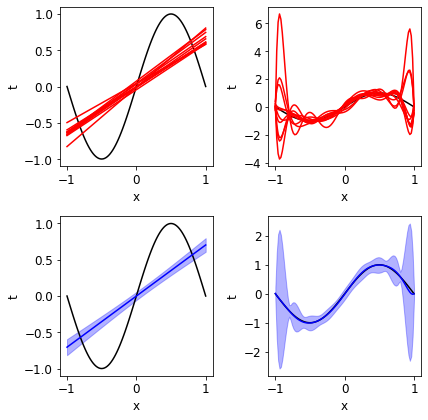

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [4, 4] # inches
mpl.rcParams['font.size'] = 12
# We set the random seed manually so that the results can be reproduced
np.random.seed(1234)
# define the data generating function
h = lambda x: np.sin(np.pi*x)
xmin = -1
xmax = 1
# Define a single independent variable
N = 11
x0 = np.linspace(xmin, xmax, num=101)
x = np.linspace(xmin, xmax, num=N)

# Define 100 realisations of the data with added noise
t = []
sigma = 0.2
for i in range(100):
    t.append(h(x) + sigma*(np.random.randn(N)))

plt.figure(figsize=[9,6])
for i,M in enumerate([1,3,10]):
    # Fit the data with a cubic model which we know works well.
    Phi = np.array([pow(x,j) for j in range(0,M+1)]).transpose()
    # Construct a basis matrix for a high resolution reconstruction
    Phi0 = np.array([pow(x0,j) for j in range(0,M+1)]).transpose()

    # Solve the normal equations using a standard solver
    weights = []
    f0 = []
    for tt in t:
        w = np.linalg.solve(np.matmul(Phi.transpose(),Phi), np.matmul(Phi.transpose(),tt))
        # record the weights
        weights.append(w)
        # evaluate the model at the data points so we can compute the error
        f0.append(np.matmul(Phi0,w))
        
    # plot the original data and 10 of the fits
    plt.subplot(2,3,i+1)
    plt.plot(x0,h(x0),'k-')
    # Plot 10 fits
    for k in range(10):
        plt.plot(x0,f0[k],'r-')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.tight_layout()
    
    #plot the original data plus the mean and variance of the fit
    plt.subplot(2,3,i+4)
    plt.plot(x0,h(x0),'k-')
    mean_fit = np.mean(np.array(f0),axis=0)
    std_fit = np.std(np.array(f0),axis=0)
    plt.fill_between(x0,mean_fit-std_fit,mean_fit+std_fit,color='blue',alpha=0.3)
    plt.plot(x0,mean_fit,'b-')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.savefig('biasvariance.png')